In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [2]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [4]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [5]:
X  =data.data
y = data.target
feature_names=data.feature_names
target_names=data.target_names

In [6]:
feature=pd.DataFrame(data=X)

In [7]:
feature.columns=feature_names

In [8]:
feature.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [9]:
cancer_df= feature

In [11]:
cancer_df['target']=y

In [12]:
cancer_df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [24]:
feature.drop(columns=['target'],inplace=True)

In [25]:
print(feature.shape)
print(target_names)
print(cancer_df.target.value_counts())

(569, 30)
['malignant' 'benign']


AttributeError: ignored

In [26]:
X_train,X_test,y_train,y_test=train_test_split(feature,y,test_size=0.2,random_state=192)

In [27]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [28]:
from xgboost import XGBClassifier

In [29]:
xgbc = XGBClassifier(n_estimators=12)

In [30]:
xgbc.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error')

[0]	validation_0-error:0.105263
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.114035
[4]	validation_0-error:0.105263
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.114035
[8]	validation_0-error:0.105263
[9]	validation_0-error:0.105263
[10]	validation_0-error:0.105263
[11]	validation_0-error:0.114035


XGBClassifier(n_estimators=12)

In [31]:
pred=xgbc.predict(X_test)

In [32]:
pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1])

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('accuracy: %.3f' % accuracy_score(y_test, pred))
print('precision: %.3f' % precision_score(y_true= y_test, y_pred=pred))
print('recall: %.3f' % recall_score(y_true= y_test, y_pred=pred))
print('F1-score: %.3f' % f1_score(y_true= y_test, y_pred=pred))
print('AUC: %.3f' % roc_auc_score(y_test, pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

accuracy: 0.886
precision: 0.931
recall: 0.893
F1-score: 0.912
AUC: 0.883
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.93      0.89      0.91        75

    accuracy                           0.89       114
   macro avg       0.87      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [34]:
from sklearn.model_selection import GridSearchCV

In [42]:
xgbc_clf = XGBClassifier(n_estimators=70)
xgbc_clf

XGBClassifier(n_estimators=70)

In [43]:
from scipy.stats import randint,uniform

In [44]:
params = {'max_depth':[5,8,12],
          'min_child_weight':[1,3,5,7],
          'colsample_bytree':[0.1,0.3,0.5,0.75,1.0],
          'learning_rate':[0.001,0.01,0.1,0.2,0.3]}

In [45]:
gridcv=GridSearchCV(xgbc_clf,param_grid=params)

In [46]:
gridcv.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[49]	validation_0-error:0.070175
[50]	validation_0-error:0.070175
[51]	validation_0-error:0.070175
[52]	validation_0-error:0.070175
[53]	validation_0-error:0.070175
[54]	validation_0-error:0.070175
[55]	validation_0-error:0.070175
[56]	validation_0-error:0.070175
[57]	validation_0-error:0.070175
[58]	validation_0-error:0.070175
[59]	validation_0-error:0.070175
[60]	validation_0-error:0.070175
[61]	validation_0-error:0.078947
[62]	validation_0-error:0.078947
[63]	validation_0-error:0.078947
[64]	validation_0-error:0.078947
[65]	validation_0-error:0.078947
[66]	validation_0-error:0.078947
[67]	validation_0-error:0.078947
[68]	validation_0-error:0.078947
[69]	validation_0-error:0.078947
[0]	validation_0-error:0.105263
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.070175
[8]	validation_

In [47]:
from sklearn.metrics import confusion_matrix
pred=gridcv.predict(X_test)
confusion_matrix(y_test,pred)

In [48]:
print(gridcv.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3}


In [49]:
print(gridcv.best_estimator_)

XGBClassifier(colsample_bytree=0.3, learning_rate=0.3, max_depth=5,
              min_child_weight=3, n_estimators=70)


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

print('confusion_matrix:  %s '%confusion_matrix(y_test,pred))
print('accuracy: %.3f' % accuracy_score(y_test, pred))
print('precision: %.3f' % precision_score(y_true= y_test, y_pred=pred))
print('recall: %.3f' % recall_score(y_true= y_test, y_pred=pred))
print('F1-score: %.3f' % f1_score(y_true= y_test, y_pred=pred))
print('AUC: %.3f' % roc_auc_score(y_test, pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

confusion_matrix:  [[38  1]
 [ 3 72]] 
accuracy: 0.965
precision: 0.986
recall: 0.960
F1-score: 0.973
AUC: 0.967
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [55]:
fit_importances = gridcv.best_estimator_.feature_importances_

In [56]:
fit_importances = pd.Series(fit_importances,index=feature_names)

In [57]:
fit_importances

mean radius                0.032035
mean texture               0.003112
mean perimeter             0.146147
mean area                  0.195230
mean smoothness            0.001486
mean compactness           0.005022
mean concavity             0.219307
mean concave points        0.011817
mean symmetry              0.000798
mean fractal dimension     0.007898
radius error               0.014905
texture error              0.000000
perimeter error            0.006709
area error                 0.008905
smoothness error           0.002862
compactness error          0.009279
concavity error            0.002562
concave points error       0.001751
symmetry error             0.001975
fractal dimension error    0.000000
worst radius               0.017891
worst texture              0.016252
worst perimeter            0.077364
worst area                 0.007277
worst smoothness           0.012153
worst compactness          0.069701
worst concavity            0.013029
worst concave points       0

In [63]:
fit_importances=fit_importances.sort_values(ascending=False)

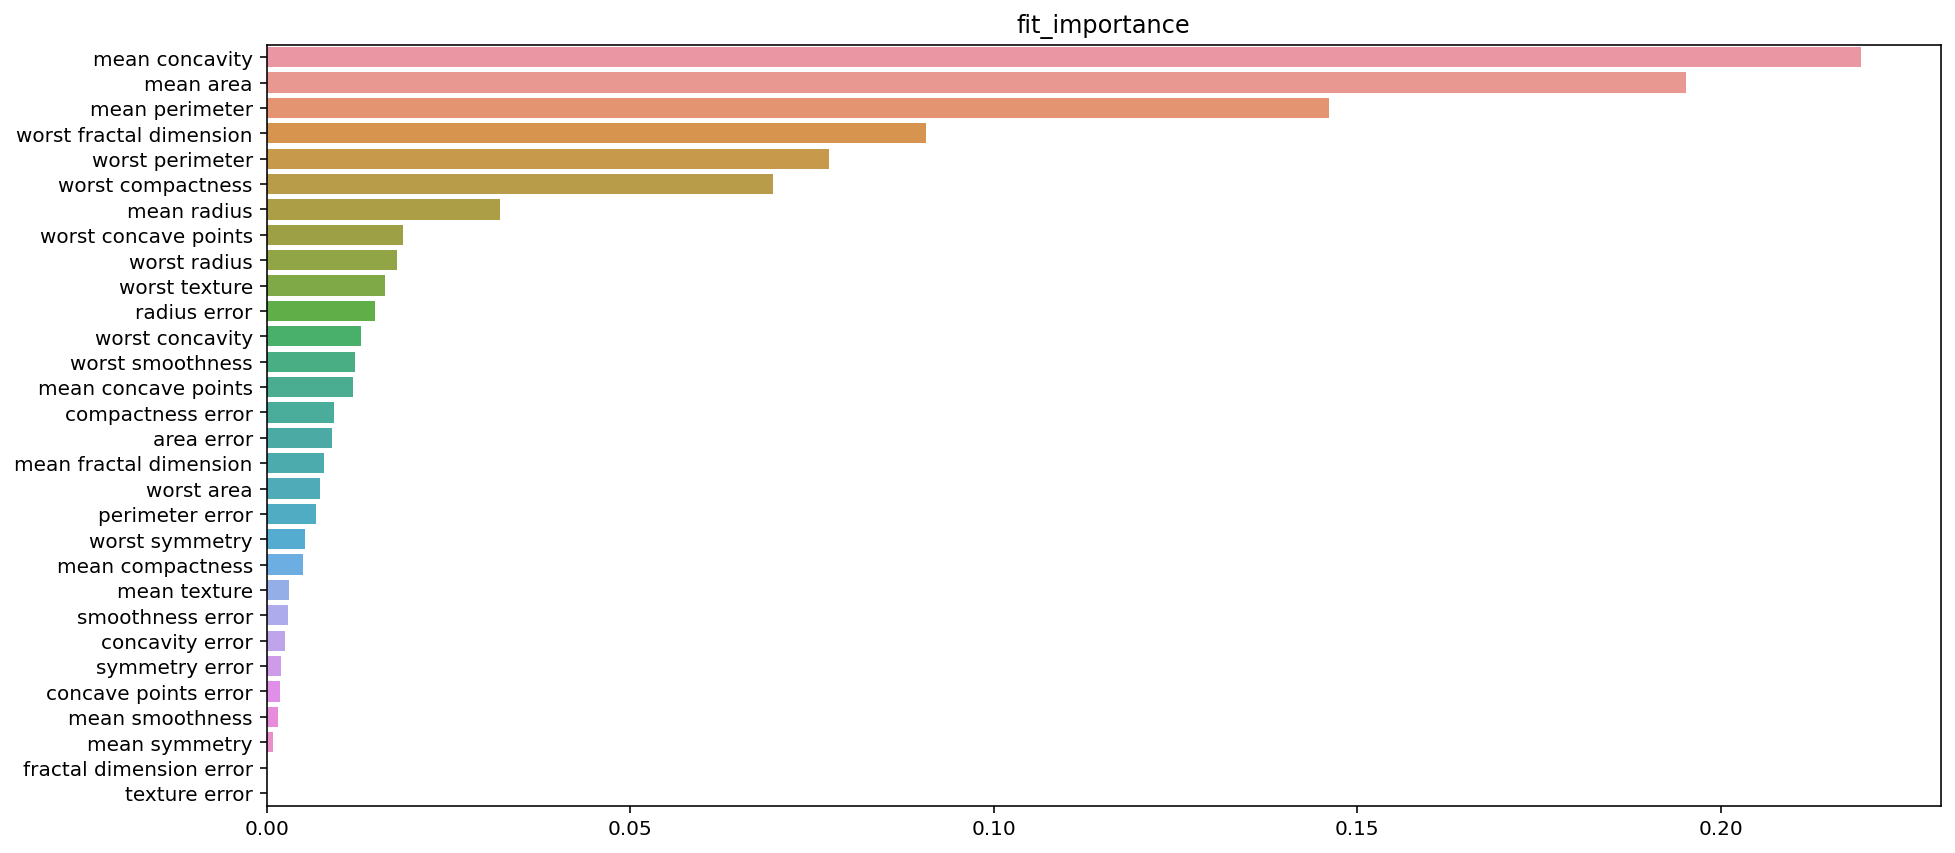

In [64]:
plt.figure(figsize=(15,7))
plt.title('fit_importance')
sns.barplot(x=fit_importances,y=fit_importances.index)